In [1]:
pip install catboost

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
new_df = pd.read_csv("/content/Thyroid-Dataset.csv")

In [4]:
new_df.head().T

0         1         2              3  \
age                              29        41        36             32   
sex                               F         F         F              F   
on thyroxine                  False     False     False          False   
query on thyroxine            False     False     False          False   
on antithyroid medication     False     False     False          False   
sick                          False     False     False          False   
pregnant                      False     False     False          False   
thyroid surgery               False     False     False          False   
I131 treatment                False     False     False          False   
query hypothyroid             False     False     False          False   
query hyperthyroid            False      True     False          False   
lithium                       False     False     False          False   
goitre                        False     False     False          False   
tumor                         False     False     False          False   
hypopituitary                 False     False     False          False   
psych                         False     False     False          False   
TSH                             1.6       NaN       NaN            NaN   
T3                              1.9       NaN       NaN            NaN   
TT4                           128.0       NaN       NaN            NaN   
T4U                             NaN       NaN       NaN            NaN   
FTI                             NaN       NaN       NaN            NaN   
referral source               other     other     other          other   
class                      negative  negative  negative  miscellaneous   

                                  4  
age                              60  
sex                               F  
on thyroxine                  False  
query on thyroxine            False  
on antithyroid medication     False  
sick                          False  
pregnant                      False  
thyroid surgery               False  
I131 treatment                False  
query hypothyroid             False  
query hyperthyroid            False  
lithium                       False  
goitre                        False  
tumor                         False  
hypopituitary                 False  
psych                         False  
TSH                             NaN  
T3                              NaN  
TT4                             NaN  
T4U                             NaN  
FTI                             NaN  
referral source               other  
class                      negative

In [5]:
new_df.tail().T

9166      9167             9168      9169  \
age                              56        22               69        47   
sex                               M         M                M         F   
on thyroxine                  False     False            False     False   
query on thyroxine            False     False            False     False   
on antithyroid medication     False     False            False     False   
sick                          False     False            False     False   
pregnant                      False     False            False     False   
thyroid surgery               False     False            False     False   
I131 treatment                False     False            False     False   
query hypothyroid             False     False            False     False   
query hyperthyroid             True     False            False     False   
lithium                       False     False            False     False   
goitre                        False     False            False     False   
tumor                         False     False            False     False   
hypopituitary                 False     False            False     False   
psych                         False     False            False     False   
TSH                             NaN       NaN              NaN       NaN   
T3                              NaN       NaN              NaN       NaN   
TT4                            64.0      91.0            113.0      75.0   
T4U                            0.83      0.92             1.27      0.85   
FTI                            77.0      99.0             89.0      88.0   
referral source                 SVI       SVI              SVI     other   
class                      negative  negative  binding protein  negative   

                               9170  
age                              31  
sex                               M  
on thyroxine                  False  
query on thyroxine            False  
on antithyroid medication     False  
sick                          False  
pregnant                      False  
thyroid surgery               False  
I131 treatment                False  
query hypothyroid              True  
query hyperthyroid            False  
lithium                       False  
goitre                        False  
tumor                         False  
hypopituitary                 False  
psych                         False  
TSH                             NaN  
T3                              NaN  
TT4                            66.0  
T4U                            1.02  
FTI                            65.0  
referral source               other  
class                      negative

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        8864 non-null   object 
 2   on thyroxine               9171 non-null   bool   
 3   query on thyroxine         9171 non-null   bool   
 4   on antithyroid medication  9171 non-null   bool   
 5   sick                       9171 non-null   bool   
 6   pregnant                   9171 non-null   bool   
 7   thyroid surgery            9171 non-null   bool   
 8   I131 treatment             9171 non-null   bool   
 9   query hypothyroid          9171 non-null   bool   
 10  query hyperthyroid         9171 non-null   bool   
 11  lithium                    9171 non-null   bool   
 12  goitre                     9171 non-null   bool   
 13  tumor                      9171 non-null   bool 

In [8]:
new_df.shape

(9171, 23)

Our dataset has extreme outliers, especially in important continuous features like age, TSH, T3, TT4, T4U, FTI

In [9]:
# Separate numeric and categorical columns
num_cols = new_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [10]:
new_df.describe()

age          TSH           T3          TT4          T4U  \
count   9171.000000  8329.000000  6568.000000  8730.000000  8363.000000   
mean      73.560680     5.218993     1.970629   108.700305     0.976056   
std     1184.041182    24.185398     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI  
count  8370.000000  
mean    113.640746  
std      41.551650  
min       1.400000  
25%      93.000000  
50%     109.000000  
75%     128.000000  
max     881.000000

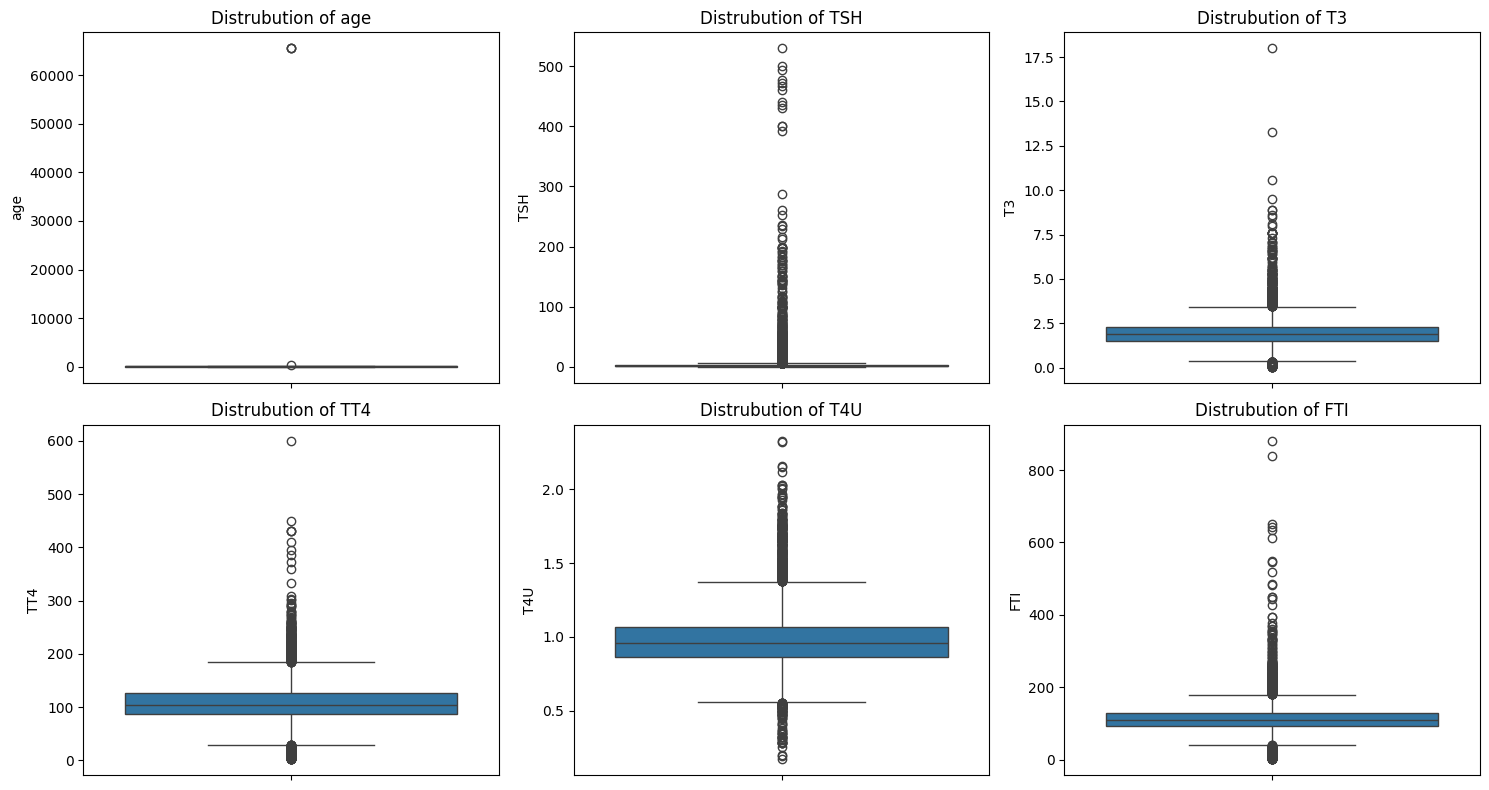

In [11]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(new_df[col])
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

In [12]:
# Backup Dataframe for future usage
df = new_df.copy()

# Step-by-Step Plan to Treat Outliers Without Dropping
We'll apply these preprocessing steps:

- Log-transform highly skewed features
- Cap extreme values (winsorize) using percentiles
- Scale the features using RobustScaler

In [13]:
# Log Transformation (for right-skewed features)
# These features have heavy right-skew based on stats:
# ‚Üí TSH, TT4, FTI (also T3 mildly)

new_df['TSH_log'] = np.log1p(new_df['TSH'])      # log1p(x) = log(1 + x), safe for 0
new_df['TT4_log'] = np.log1p(new_df['TT4'])
new_df['FTI_log'] = np.log1p(new_df['FTI'])
new_df['T3_log'] = np.log1p(new_df['T3'])

In [14]:
# Winsorize (cap extreme values)
# This avoids distortions from rare but extreme values, preserves rows:

def winsorize_series(s, lower=0.01, upper=0.99):
    low_val = s.quantile(lower)
    high_val = s.quantile(upper)
    return s.clip(lower=low_val, upper=high_val)

In [15]:
new_df['Age'] = new_df['age']

features_to_winsor = ['Age', 'TSH_log', 'TT4_log', 'FTI_log', 'T3_log', 'T4U']

for col in features_to_winsor:
    new_df[col + '_capped'] = winsorize_series(new_df[col])

In [ ]:
new_df.describe()

age          TSH           T3          TT4          T4U  \
count   9171.000000  8329.000000  6568.000000  8730.000000  8363.000000   
mean      73.560680     5.218993     1.970629   108.700305     0.976056   
std     1184.041182    24.185398     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI      TSH_log      TT4_log      FTI_log       T3_log  \
count  8370.000000  8329.000000  8730.000000  8370.000000  6568.000000   
mean    113.640746     1.009677     4.631019     4.677226     1.050459   
std      41.551650     0.892805     0.411052     0.404971     0.275446   
min       1.400000     0.004988     1.098612     0.875469     0.048790   
25%      93.000000     0.378436     4.477337     4.543295     0.916291   
50%     109.000000     0.875469     4.653960     4.700480     1.064711   
75%     128.000000     1.308333     4.844187     4.859812     1.193922   
max     881.000000     6.274762     6.398595     6.782192     2.944439   

                Age   Age_capped  TSH_log_capped  TT4_log_capped  \
count   9171.000000  9171.000000     8329.000000     8730.000000   
mean      73.560680    52.149820        1.003598        4.635981   
std     1184.041182    18.738271        0.864552        0.367167   
min        1.000000    14.000000        0.009950        2.833213   
25%       37.000000    37.000000        0.378436        4.477337   
50%       55.000000    55.000000        0.875469        4.653960   
75%       68.000000    68.000000        1.308333        4.844187   
max    65526.000000    87.000000        4.562920        5.423670   

       FTI_log_capped  T3_log_capped   T4U_capped  
count     8370.000000    6568.000000  8363.000000  
mean         4.682039       1.049002     0.975824  
std          0.348660       0.264579     0.191794  
min          2.872653       0.262364     0.550000  
25%          4.543295       0.916291     0.860000  
50%          4.700480       1.064711     0.960000  
75%          4.859812       1.193922     1.065000  
max          5.507842       1.791759     1.693800

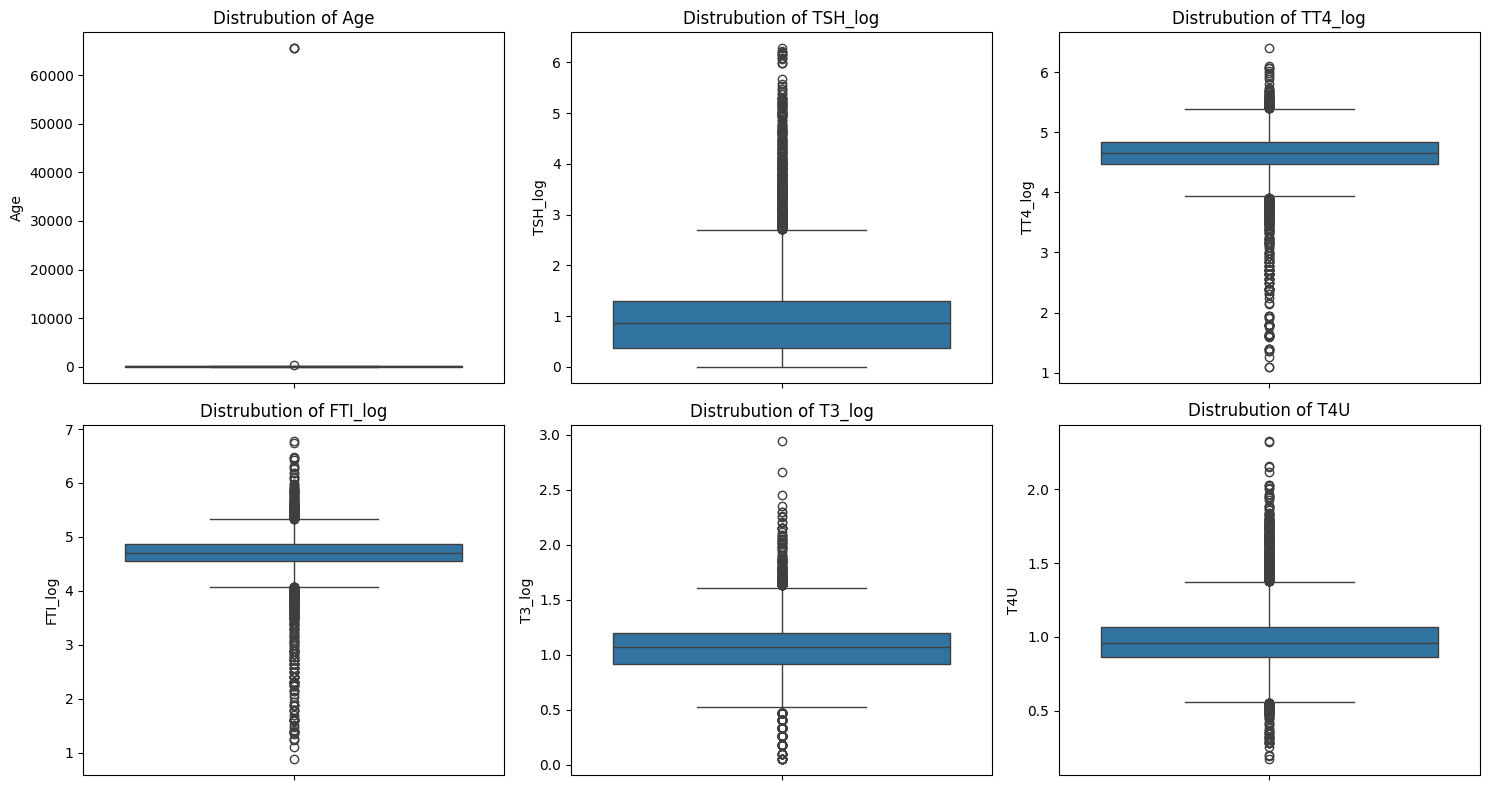

In [16]:
plt.figure(figsize=(15,8))
for i, col in enumerate(features_to_winsor):
  plt.subplot(2,3,i+1)
  sns.boxplot(new_df[col])
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

In [17]:
# Robust Scaling (resistant to outliers

robust_features = [col + '_capped' for col in features_to_winsor]
scaler = RobustScaler()
scaled_array = scaler.fit_transform(new_df[robust_features])

# Replace original columns with scaled ones (or create new df)
new_df_scaled = pd.DataFrame(scaled_array, columns=robust_features)

In [18]:
new_df_scaled.describe()

Age_capped  TSH_log_capped  TT4_log_capped  FTI_log_capped  \
count  9171.000000     8329.000000     8730.000000     8370.000000   
mean     -0.091941        0.137789       -0.049009       -0.058265   
std       0.604460        0.929730        1.000864        1.101551   
min      -1.322581       -0.930769       -4.963188       -5.774806   
25%      -0.580645       -0.534503       -0.481459       -0.496609   
50%       0.000000        0.000000        0.000000        0.000000   
75%       0.419355        0.465497        0.518541        0.503391   
max       1.032258        3.965443        2.098157        2.550763   

       T3_log_capped   T4U_capped  
count    6568.000000  8363.000000  
mean       -0.056579     0.077189  
std         0.952987     0.935578  
min        -2.889967    -2.000000  
25%        -0.534593    -0.487805  
50%         0.000000     0.000000  
75%         0.465407     0.512195  
max         2.618752     3.579512

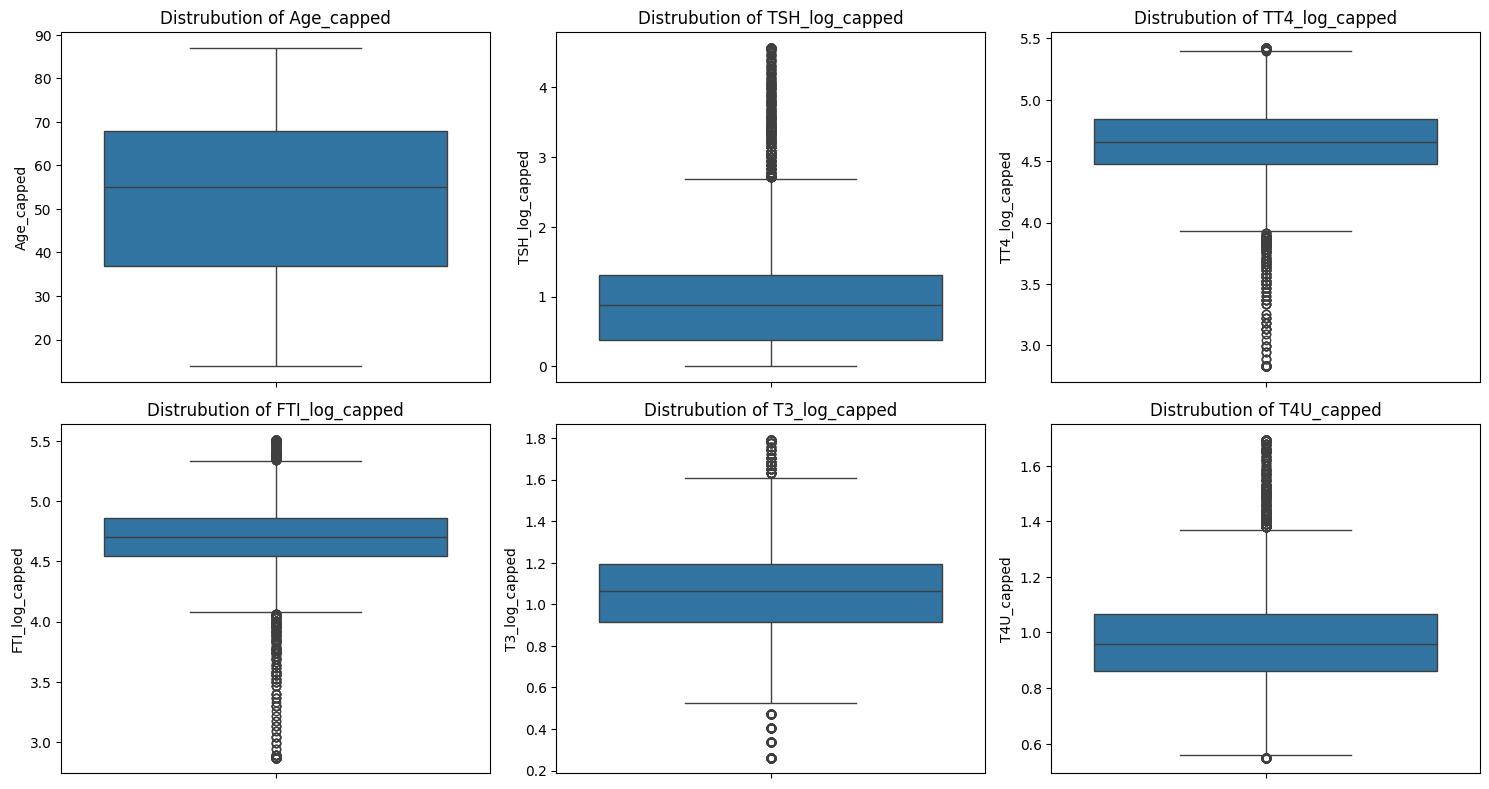

In [19]:
plt.figure(figsize=(15,8))
for i, col in enumerate(robust_features):
  plt.subplot(2,3,i+1)
  sns.boxplot(new_df[col])
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        8864 non-null   object 
 2   on thyroxine               9171 non-null   bool   
 3   query on thyroxine         9171 non-null   bool   
 4   on antithyroid medication  9171 non-null   bool   
 5   sick                       9171 non-null   bool   
 6   pregnant                   9171 non-null   bool   
 7   thyroid surgery            9171 non-null   bool   
 8   I131 treatment             9171 non-null   bool   
 9   query hypothyroid          9171 non-null   bool   
 10  query hyperthyroid         9171 non-null   bool   
 11  lithium                    9171 non-null   bool   
 12  goitre                     9171 non-null   bool   
 13  tumor                      9171 non-null   bool 

In [21]:
col_to_drop = ['age', 'Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI','TSH_log', 'T3_log', 'TT4_log', 'T4U', 'FTI_log']
df_std = new_df.drop(columns=col_to_drop, axis=1)

In [ ]:
order_of_col = ['Age_capped', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_log_capped',
                'T3_log_capped', 'TT4_log_capped', 'T4U_capped', 'FTI_log_capped', 'referral source',
                'class'
                ]

df_std = df_std[order_of_col]

In [22]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        8864 non-null   object 
 1   on thyroxine               9171 non-null   bool   
 2   query on thyroxine         9171 non-null   bool   
 3   on antithyroid medication  9171 non-null   bool   
 4   sick                       9171 non-null   bool   
 5   pregnant                   9171 non-null   bool   
 6   thyroid surgery            9171 non-null   bool   
 7   I131 treatment             9171 non-null   bool   
 8   query hypothyroid          9171 non-null   bool   
 9   query hyperthyroid         9171 non-null   bool   
 10  lithium                    9171 non-null   bool   
 11  goitre                     9171 non-null   bool   
 12  tumor                      9171 non-null   bool   
 13  hypopituitary              9171 non-null   bool 

In [23]:
df_std.isna().sum()

sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
referral source                 0
class                           0
Age_capped                      0
TSH_log_capped                842
TT4_log_capped                441
FTI_log_capped                801
T3_log_capped                2603
T4U_capped                    808
dtype: int64

In [24]:
df_std.sample(5).T

3938             1807                 5590  \
sex                               F                F                    F   
on thyroxine                  False            False                 True   
query on thyroxine            False            False                False   
on antithyroid medication     False            False                False   
sick                          False            False                False   
pregnant                      False            False                False   
thyroid surgery               False            False                False   
I131 treatment                False            False                 True   
query hypothyroid             False            False                 True   
query hyperthyroid            False            False                False   
lithium                       False            False                False   
goitre                        False            False                False   
tumor                          True            False                False   
hypopituitary                 False            False                False   
psych                         False            False                False   
referral source                 SVI             STMW                other   
class                      negative  binding protein  replacement therapy   
Age_capped                       84               31                   65   
TSH_log_capped             0.741937          0.09531             0.029559   
TT4_log_capped              4.75359         5.337538             5.043425   
FTI_log_capped             4.804021         4.890349             5.141664   
T3_log_capped              1.163151         1.435085             1.193922   
T4U_capped                     0.95             1.57                  0.9   

                               2737      4262  
sex                               F         F  
on thyroxine                  False     False  
query on thyroxine            False     False  
on antithyroid medication     False     False  
sick                          False     False  
pregnant                      False     False  
thyroid surgery               False     False  
I131 treatment                False     False  
query hypothyroid             False     False  
query hyperthyroid            False     False  
lithium                       False     False  
goitre                        False     False  
tumor                         False     False  
hypopituitary                 False     False  
psych                         False     False  
referral source               other       SVI  
class                      negative  negative  
Age_capped                       58        78  
TSH_log_capped             0.182322  0.300105  
TT4_log_capped             4.543295  4.543295  
FTI_log_capped             4.718499   4.51086  
T3_log_capped              1.064711  1.098612  
T4U_capped                     0.84      1.03

# Dealing NaN Nulls

In [25]:
# Categorical NaNs
df_std['sex'] = df['sex']  # assuming you have this

df_std['sex'] = df_std['sex'].fillna(df_std['sex'].mode()[0])

In [26]:
df_std['sex']

0       F
1       F
2       F
3       F
4       F
       ..
9166    M
9167    M
9168    M
9169    F
9170    M
Name: sex, Length: 9171, dtype: object

In [27]:
df_std_copy = df_std.copy()

In [28]:
# Numerical NaNs

# Select only numeric columns for imputation
cols_to_impute = ['Age_capped', 'TSH_log_capped', 'T3_log_capped', 'TT4_log_capped', 'T4U_capped', 'FTI_log_capped']
knn_df = df_std_copy[cols_to_impute]

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(knn_df)

# Replace original columns
df_std_copy = df_std_copy[cols_to_impute].copy()
df_std_copy[cols_to_impute] = knn_imputed

In [29]:
df_std_copy

Age_capped  TSH_log_capped  T3_log_capped  TT4_log_capped  T4U_capped  \
0           29.0        0.955511       1.064711        4.859812       1.182   
1           41.0        1.212129       1.141799        4.911843       0.888   
2           36.0        1.065637       1.136101        4.796527       1.010   
3           32.0        0.230040       1.156202        4.677420       1.114   
4           60.0        0.667850       0.885843        4.360767       0.896   
...          ...             ...            ...             ...         ...   
9166        56.0        0.925013       1.075934        4.174387       0.830   
9167        22.0        0.436767       1.094318        4.521789       0.920   
9168        69.0        0.303052       1.069221        4.736198       1.270   
9169        47.0        0.926851       0.929254        4.330733       0.850   
9170        31.0        2.457414       1.100699        4.204693       1.020   

      FTI_log_capped  
0           4.769548  
1           4.743072  
2           4.616965  
3           4.764260  
4           4.360451  
...              ...  
9166        4.356709  
9167        4.605170  
9168        4.499810  
9169        4.488636  
9170        4.189655  

[9171 rows x 6 columns]

In [30]:
df_std['Age_capped'] = df_std_copy['Age_capped']
df_std['TSH_log_capped'] = df_std_copy['TSH_log_capped']
df_std['T3_log_capped'] = df_std_copy['T3_log_capped']
df_std['TT4_log_capped'] = df_std_copy['TT4_log_capped']
df_std['T4U_capped'] = df_std_copy['T4U_capped']
df_std['FTI_log_capped'] = df_std_copy['FTI_log_capped']

In [31]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        9171 non-null   object 
 1   on thyroxine               9171 non-null   bool   
 2   query on thyroxine         9171 non-null   bool   
 3   on antithyroid medication  9171 non-null   bool   
 4   sick                       9171 non-null   bool   
 5   pregnant                   9171 non-null   bool   
 6   thyroid surgery            9171 non-null   bool   
 7   I131 treatment             9171 non-null   bool   
 8   query hypothyroid          9171 non-null   bool   
 9   query hyperthyroid         9171 non-null   bool   
 10  lithium                    9171 non-null   bool   
 11  goitre                     9171 non-null   bool   
 12  tumor                      9171 non-null   bool   
 13  hypopituitary              9171 non-null   bool 

In [32]:
# Removing Duplicates

df_std.duplicated().sum()

np.int64(109)

In [33]:
df_std.drop_duplicates(inplace=True)
df_std.reset_index(drop=True, inplace=True)

In [ ]:
df_std.sample(5).T

1649      6735      5882  \
Age_capped                     70.0      76.0      83.0   
sex                               F         M         F   
on thyroxine                  False     False     False   
query on thyroxine            False     False     False   
on antithyroid medication     False     False     False   
sick                          False     False     False   
pregnant                      False     False     False   
thyroid surgery               False     False     False   
I131 treatment                False     False     False   
query hypothyroid             False     False     False   
query hyperthyroid             True     False     False   
lithium                       False     False     False   
goitre                        False     False     False   
tumor                         False     False     False   
hypopituitary                 False     False     False   
psych                         False     False     False   
TSH_log_capped             1.360977  0.678034  0.307485   
T3_log_capped              0.993252  0.902903  1.064711   
TT4_log_capped             4.787492  4.158883  4.574711   
T4U_capped                     0.96      0.88      0.94   
FTI_log_capped             4.820282  4.290459  4.634729   
referral source               other     other       SVI   
class                      negative  negative  negative   

                                             8614                 2149  
Age_capped                                   54.0                 65.0  
sex                                             F                    F  
on thyroxine                                False                 True  
query on thyroxine                          False                False  
on antithyroid medication                   False                False  
sick                                        False                False  
pregnant                                    False                False  
thyroid surgery                             False                False  
I131 treatment                              False                False  
query hypothyroid                            True                False  
query hyperthyroid                          False                False  
lithium                                     False                False  
goitre                                      False                False  
tumor                                       False                False  
hypopituitary                               False                False  
psych                                       False                False  
TSH_log_capped                           3.135494              0.04879  
T3_log_capped                            0.916291             1.481605  
TT4_log_capped                           3.970292             5.351858  
T4U_capped                                   0.84                 1.05  
FTI_log_capped                           4.143135             5.298317  
referral source                              SVHD                other  
class                      hypothyroid conditions  replacement therapy

In [34]:
# Separate numeric and categorical columns
num_cols = df_std.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df_std.select_dtypes(include='object').columns.difference(['class']).tolist()

In [35]:
print(num_cols)
print(cat_cols)

['Age_capped', 'TSH_log_capped', 'TT4_log_capped', 'FTI_log_capped', 'T3_log_capped', 'T4U_capped']
['referral source', 'sex']


Since these are binary features (yes/no indicators), Option 2 (0/1) is the best choice for Random Forest + MLFS + pipeline:

In [36]:
bool_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
    'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych'
]

In [37]:
# One-Hot Encoding for Bool dtypes Columns

df_std[bool_cols] = df_std[bool_cols].replace({True: 1, False: 0})

<ipython-input-37-3c33cb87abad>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_std[bool_cols] = df_std[bool_cols].replace({True: 1, False: 0})


In [38]:
df_std.rename(columns={
    'Age_capped': 'age',
    'TSH_log_capped': 'TSH',
    'T3_log_capped': 'T3',
    'TT4_log_capped': 'TT4',
    'T4U_capped': 'T4U',
    'FTI_log_capped': 'FTI'
}, inplace=True)


In [39]:
df_cleaned = df_std.copy()

In [40]:
df_cleaned['age'] = df_cleaned['age'].astype(int)

# Encode Categorical Variables
Random Forest doesn‚Äôt need scaling but needs Label Encoding or OneHotEncoding for non-boolean categories.

In [41]:
# Encode referral source and other multi-class columns
df_cleaned['referral source'] = LabelEncoder().fit_transform(df_cleaned['referral source'])
df_cleaned['sex'] = LabelEncoder().fit_transform(df_cleaned['sex'])

# Encode target
target_encoder = LabelEncoder()
df_cleaned['class'] = target_encoder.fit_transform(df_cleaned['class'])

X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']

In [42]:
df_std['class'].value_counts()

class
negative                   6683
hypothyroid conditions      593
general health              561
binding protein             414
replacement therapy         336
discordant results          197
hyperthyroid conditions     182
miscellaneous                63
antithyroid treatment        33
Name: count, dtype: int64

In [43]:
df_cleaned['class'].value_counts()

class
7    6683
5     593
3     561
1     414
8     336
2     197
4     182
6      63
0      33
Name: count, dtype: int64

# Feature Selection using MLFS (ETC)

In [44]:
y.shape

(9062,)

In [45]:
# ETC for feature importances
etc = ExtraTreesClassifier(n_estimators=200, max_depth=20, criterion='entropy', random_state=42)
etc.fit(X, y)

# Get feature importances
importances = etc.feature_importances_
feature_names = X.columns
selected_features = feature_names[importances > 0.015]
print("Selected Features:", selected_features.tolist())

# Filter dataset
X_selected = X[selected_features]


Selected Features: ['sex', 'on thyroxine', 'referral source', 'age', 'TSH', 'TT4', 'FTI', 'T3', 'T4U']


In [46]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9062 entries, 0 to 9061
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              9062 non-null   int64  
 1   on thyroxine     9062 non-null   int64  
 2   referral source  9062 non-null   int64  
 3   age              9062 non-null   int64  
 4   TSH              9062 non-null   float64
 5   TT4              9062 non-null   float64
 6   FTI              9062 non-null   float64
 7   T3               9062 non-null   float64
 8   T4U              9062 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 637.3 KB


# Train Random Forest
Based on the research paper we are implementing and following;

[Thyroid Disease Prediction Using Selective Features and Machine Learning Techniques](https://pmc.ncbi.nlm.nih.gov/articles/PMC9405591/#B22-cancers-14-03914)

# Model Training Pipeline

In [ ]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE to balance training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


# Random Forest with RandomizedSearchCV for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced_subsample', 'balanced', None],
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_bal, y_train_bal)
print("‚úÖ Best RF parameters:", random_search.best_params_)

# 5. Calibrate the best RF model
best_rf = random_search.best_estimator_
calibrated_rf = CalibratedClassifierCV(best_rf, method='sigmoid', cv='prefit')
calibrated_rf.fit(X_train_bal, y_train_bal)

# 6. Predict and evaluate
y_pred = calibrated_rf.predict(X_test)
print("\nüìä Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
‚úÖ Best RF parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': None}


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



üìä Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24         7
           1       0.60      0.82      0.69        83
           2       0.44      0.64      0.52        39
           3       0.79      0.93      0.86       112
           4       0.54      0.75      0.63        36
           5       0.88      0.96      0.92       119
           6       0.08      0.23      0.12        13
           7       0.98      0.87      0.92      1337
           8       0.71      0.96      0.82        67

    accuracy                           0.87      1813
   macro avg       0.58      0.72      0.63      1813
weighted avg       0.90      0.87      0.88      1813



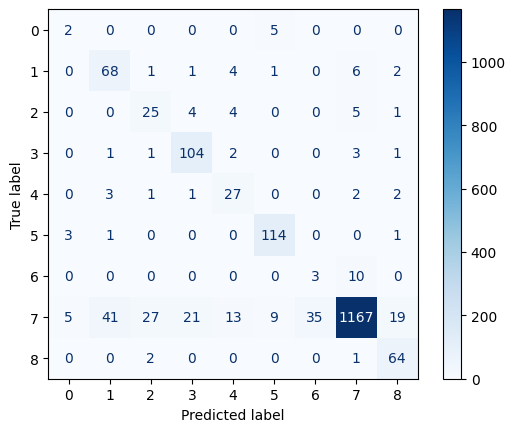

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(calibrated_rf, X_test, y_test, cmap='Blues')

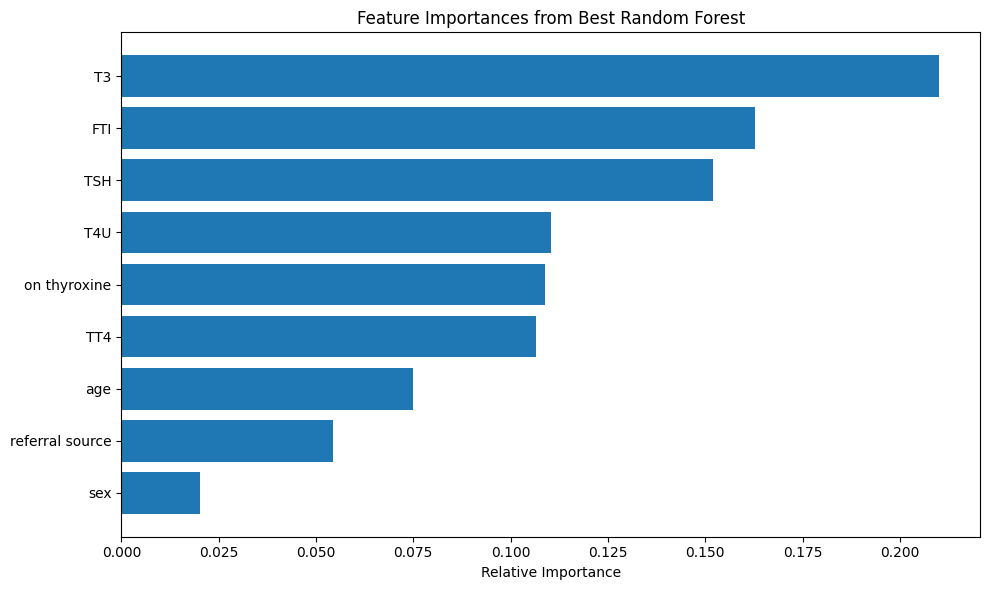

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_selected.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Best Random Forest")
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Models dictionary
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, clf in models.items():
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42,  k_neighbors=1)),
        ('classifier', clf)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1_macro')
    results[name] = scores
    print(f"{name} - Mean Macro F1: {scores.mean():.4f} (Std: {scores.std():.4f})")

Random Forest - Mean Macro F1: 0.6689 (Std: 0.0338)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Macro F1: 0.6694 (Std: 0.0353)
CatBoost - Mean Macro F1: 0.6668 (Std: 0.0169)
Logistic Regression - Mean Macro F1: 0.4308 (Std: 0.0170)
SVM - Mean Macro F1: 0.5684 (Std: 0.0202)
KNN - Mean Macro F1: 0.5442 (Std: 0.0300)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Mean Macro F1: 0.5870 (Std: 0.0224)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
# Assuming df_cleaned is your DataFrame and 'class' is the column of interest
value_counts_series = new_df['class'].value_counts()
value_names = value_counts_series.index.tolist()

print("Value names in the 'class' column:")
print(value_names)
print(new_df['class'].value_counts())

Value names in the 'class' column:
['negative', 'hypothyroid conditions', 'general health', 'binding protein', 'replacement therapy', 'discordant results', 'hyperthyroid conditions', 'miscellaneous', 'antithyroid treatment']
class
negative                   6770
hypothyroid conditions      593
general health              561
binding protein             414
replacement therapy         336
discordant results          197
hyperthyroid conditions     182
miscellaneous                85
antithyroid treatment        33
Name: count, dtype: int64


In [48]:
print(df_cleaned['class'].value_counts())

class
7    6683
5     593
3     561
1     414
8     336
2     197
4     182
6      63
0      33
Name: count, dtype: int64


# Downsampling

# Map to 5 grouped classes
group_map = {
    7: 0,              # Normal -> 7:Negative

    5: 1, 8: 1,        # Hypothyroid-related -> 5:Hypothyroid | 8:Replacement Therapy
    4: 2, 0: 2,        # Hyperthyroid-related -> 4:Hyperthyroid | 0:anti-thyroid treat
    1: 3, 2: 3,        # Unclear/ambiguous (other) -> 1:Binding Protein | 2:Discordant Results
    3:4, 2: 4          # Lab anomalies/non-thyroid-related -> 3:General Health | 6:Miscellaneous
}


In [49]:
# Map to 5 grouped classes
group_map = {
    7: 0,              # Normal -> 7:Negative
    5: 1, 8: 1,        # Hypothyroid-related -> 5:Hypothyroid | 8:Replacement Therapy
    4: 2, 0: 2,        # Hyperthyroid-related -> 4:Hyperthyroid | 0:anti-thyroid treat
    1: 3, 2: 3,        # Unclear/ambiguous (other) -> 1:Binding Protein | 2:Discordant Results
    3:4, 2: 4          # Lab anomalies/non-thyroid-related -> 3:General Health | 6:Miscellaneous
}


In [50]:
copy_df_cleaned = df_cleaned.copy()

copy_df_cleaned['class'] = df_cleaned['class'].map(group_map)

In [51]:
copy_df_cleaned['class'].isna().sum()

np.int64(63)

In [52]:
copy_df_cleaned.dropna(subset=['class'], inplace=True)

In [53]:
copy_df_cleaned.shape

(8999, 23)

In [54]:
copy_df_cleaned['class'].isna().sum()

np.int64(0)

In [55]:
copy_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8999 entries, 0 to 9061
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        8999 non-null   int64  
 1   on thyroxine               8999 non-null   int64  
 2   query on thyroxine         8999 non-null   int64  
 3   on antithyroid medication  8999 non-null   int64  
 4   sick                       8999 non-null   int64  
 5   pregnant                   8999 non-null   int64  
 6   thyroid surgery            8999 non-null   int64  
 7   I131 treatment             8999 non-null   int64  
 8   query hypothyroid          8999 non-null   int64  
 9   query hyperthyroid         8999 non-null   int64  
 10  lithium                    8999 non-null   int64  
 11  goitre                     8999 non-null   int64  
 12  tumor                      8999 non-null   int64  
 13  hypopituitary              8999 non-null   int64  
 1

In [56]:
copy_df_cleaned['class'] = copy_df_cleaned['class'].astype(int)

In [57]:
copy_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8999 entries, 0 to 9061
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        8999 non-null   int64  
 1   on thyroxine               8999 non-null   int64  
 2   query on thyroxine         8999 non-null   int64  
 3   on antithyroid medication  8999 non-null   int64  
 4   sick                       8999 non-null   int64  
 5   pregnant                   8999 non-null   int64  
 6   thyroid surgery            8999 non-null   int64  
 7   I131 treatment             8999 non-null   int64  
 8   query hypothyroid          8999 non-null   int64  
 9   query hyperthyroid         8999 non-null   int64  
 10  lithium                    8999 non-null   int64  
 11  goitre                     8999 non-null   int64  
 12  tumor                      8999 non-null   int64  
 13  hypopituitary              8999 non-null   int64  
 1

In [58]:
print(copy_df_cleaned['class'].value_counts())

class
0    6683
1     929
4     758
3     414
2     215
Name: count, dtype: int64



{

    7: 0,              # Normal -> 7:Negative
    5: 1, 8: 1,        # Hypothyroid-related -> 5:Hypothyroid | 8:Replacement Therapy
    4: 2, 0: 2,        # Hyperthyroid-related -> 4:Hyperthyroid | 0:anti-thyroid treat
    1: 3, 2: 3,        # Other (Unclear/ambiguous) -> 1:Binding Protein | 2:Discordant Results
    3:4, 2: 4          # Misc (Lab anomalies/non-thyroid-related) -> 3:General Health | 6:Miscellaneous
}


In [59]:
# Downsample the 'normal' diagnosis class only to 2000
normal_df = copy_df_cleaned[copy_df_cleaned['class'] == 0].sample(n=2000, random_state=42)

# Include all rows from other classes as they are
hypo_df = copy_df_cleaned[copy_df_cleaned['class'] == 1]
hyper_df = copy_df_cleaned[copy_df_cleaned['class'] == 2]
other_df = copy_df_cleaned[copy_df_cleaned['class'] == 3]
misc_df = copy_df_cleaned[copy_df_cleaned['class'] == 4]

In [60]:
df_bal = pd.concat([normal_df, hypo_df, hyper_df, other_df, misc_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_bal['class'].value_counts())

class
0    2000
1     929
4     758
3     414
2     215
Name: count, dtype: int64


In [61]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        4316 non-null   int64  
 1   on thyroxine               4316 non-null   int64  
 2   query on thyroxine         4316 non-null   int64  
 3   on antithyroid medication  4316 non-null   int64  
 4   sick                       4316 non-null   int64  
 5   pregnant                   4316 non-null   int64  
 6   thyroid surgery            4316 non-null   int64  
 7   I131 treatment             4316 non-null   int64  
 8   query hypothyroid          4316 non-null   int64  
 9   query hyperthyroid         4316 non-null   int64  
 10  lithium                    4316 non-null   int64  
 11  goitre                     4316 non-null   int64  
 12  tumor                      4316 non-null   int64  
 13  hypopituitary              4316 non-null   int64

In [62]:
df_bal.isna().sum().sum()

np.int64(0)

In [63]:
df_bal['referral source'].value_counts()

referral source
5    2494
3    1241
1     376
0     164
2      38
4       3
Name: count, dtype: int64

In [65]:
df_bal = df_bal.rename(columns={'on thyroxine': 'on_thyroxine', 'referral source': 'referral_source'})

In [68]:
selected_features = ['age', 'sex', 'on_thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral_source']

X = df_bal[selected_features]
y = df_bal['class']

In [69]:
X.shape

(4316, 9)

In [70]:
y.shape

(4316,)

In [71]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Random Forest

In [72]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       400
           1       0.96      0.98      0.97       186
           2       0.76      0.74      0.75        43
           3       0.80      0.92      0.85        83
           4       0.88      0.95      0.91       152

    accuracy                           0.92       864
   macro avg       0.88      0.90      0.89       864
weighted avg       0.93      0.92      0.93       864



# Train CatBoost

In [75]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       400
           1       0.95      0.98      0.97       186
           2       0.82      0.74      0.78        43
           3       0.84      0.92      0.87        83
           4       0.85      0.94      0.89       152

    accuracy                           0.93       864
   macro avg       0.89      0.90      0.89       864
weighted avg       0.93      0.93      0.93       864



Stratified Cross-Validation (to average over random test splits)

In [76]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='f1_macro')
cat_scores = cross_val_score(cat_model, X_train, y_train, cv=skf, scoring='f1_macro')


print(f"Random Forest CV Macro F1: {rf_scores.mean():.4f} ¬± {rf_scores.std():.4f}")
print(f"CatBoost CV Macro F1: {cat_scores.mean():.4f} ¬± {cat_scores.std():.4f}")

Random Forest CV Macro F1: 0.8687 ¬± 0.0151
CatBoost CV Macro F1: 0.8605 ¬± 0.0105


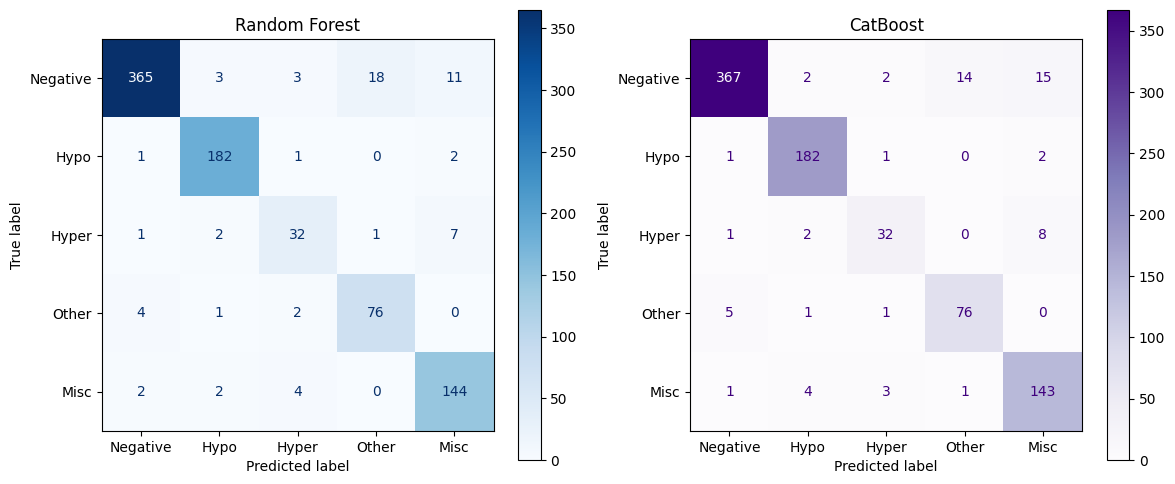

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
rf_preds = rf_model.predict(X_test)
cb_preds = cat_model.predict(X_test)    # 'cb' for catboost

# Class labels
class_names = ['Negative', 'Hypo', 'Hyper', 'Other', 'Misc']

# Confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
cb_cm = confusion_matrix(y_test, cb_preds)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=class_names)
disp_rf.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Random Forest")

# CatBoost
disp_cb = ConfusionMatrixDisplay(confusion_matrix=cb_cm, display_labels=class_names)
disp_cb.plot(ax=axes[1], cmap='Purples', values_format='d')
axes[1].set_title("CatBoost")

plt.tight_layout()
plt.show()


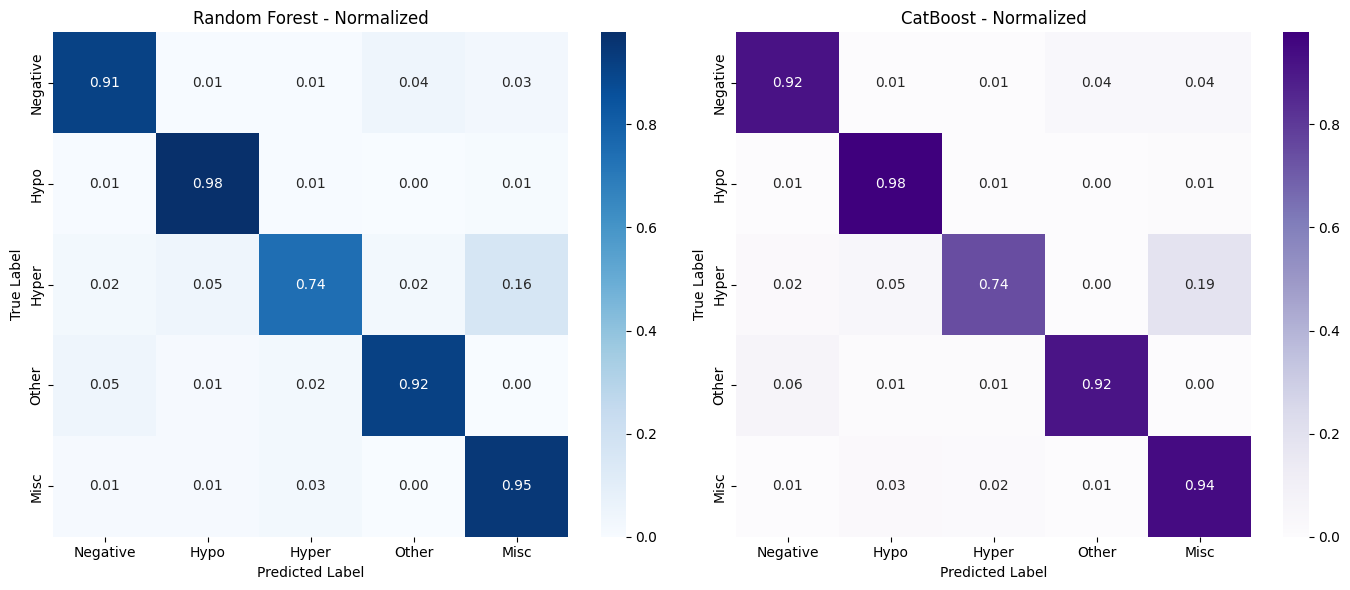

In [78]:
# Compute normalized confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds, normalize='true')
cb_cm = confusion_matrix(y_test, cb_preds, normalize='true')

labels = ['Negative', 'Hypo', 'Hyper', 'Other', 'Misc']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(rf_cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Random Forest - Normalized")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cb_cm, annot=True, fmt=".2f", cmap="Purples", xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("CatBoost - Normalized")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()


# Precision, Recall, F1 by Class

In [79]:
rf_report = classification_report(y_test, rf_preds, output_dict=True)
cb_report = classification_report(y_test, cb_preds, output_dict=True)

rf_df = pd.DataFrame(rf_report).T.loc[['0', '1', '2', '3', '4']]
cb_df = pd.DataFrame(cb_report).T.loc[['0', '1', '2', '3', '4']]

comparison_df = pd.concat([rf_df, cb_df], axis=1, keys=['Random Forest', 'CatBoost'])
print(comparison_df.T)


                                  0           1          2          3  \
Random Forest precision    0.978552    0.957895   0.761905   0.800000   
              recall       0.912500    0.978495   0.744186   0.915663   
              f1-score     0.944373    0.968085   0.752941   0.853933   
              support    400.000000  186.000000  43.000000  83.000000   
CatBoost      precision    0.978667    0.952880   0.820513   0.835165   
              recall       0.917500    0.978495   0.744186   0.915663   
              f1-score     0.947097    0.965517   0.780488   0.873563   
              support    400.000000  186.000000  43.000000  83.000000   

                                  4  
Random Forest precision    0.878049  
              recall       0.947368  
              f1-score     0.911392  
              support    152.000000  
CatBoost      precision    0.851190  
              recall       0.940789  
              f1-score     0.893750  
              support    152.000000  


# Need to Save Best Model


In [93]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [81]:
selected_features = ['age', 'sex', 'on_thyroxine', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral_source']
joblib.dump(selected_features, "selected_features.pkl")

['selected_features.pkl']

In [89]:
df_std['class'].value_counts()

class
negative                   6683
hypothyroid conditions      593
general health              561
binding protein             414
replacement therapy         336
discordant results          197
hyperthyroid conditions     182
miscellaneous                63
antithyroid treatment        33
Name: count, dtype: int64

In [92]:
Class = {0:'negative', 1:'hypothyroid', 2:'hyperthyroid', 3:'other', 4:'misc'}
joblib.dump(Class, "class.pkl")

['class.pkl']

In [ ]:
df_std['referralsource'].value_counts()

In [ ]:
df_bal['referral source'].value_counts()

In [82]:
referral_source = {'STMW': 0, 'SVHC': 1,  'SVHD': 2, 'SVI': 3,  'WEST': 4, 'other': 5}
joblib.dump(referral_source, "referral_source.pkl")

['referral_source.pkl']

In [ ]:
df_std['sex'].value_counts()

In [ ]:
df_bal['sex'].value_counts()

In [ ]:
sex = {'F': 0, 'M': 1}
joblib.dump(sex, "sex.pkl")

In [ ]:
new_df['on thyroxine'].value_counts()

In [ ]:
df_bal['on thyroxine'].value_counts()

In [83]:
on_thyroxine = {'False': 0, 'True': 1}
joblib.dump(on_thyroxine, "on_thyroxine.pkl")

['on_thyroxine.pkl']

# Use IQR method to detect & remove outliers
The IQR method is robust, avoids distortion from extreme values, and is commonly used in medical datasets.

In [ ]:
# def remove_outliers_iqr(new_df, columns, factor=1.5):
#     clean_df = new_df.copy()
#     for col in columns:
#         Q1 = clean_df[col].quantile(0.25)
#         Q3 = clean_df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - factor * IQR
#         upper_bound = Q3 + factor * IQR
#         clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]
#     return clean_df